<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#QC-Thresholds" data-toc-modified-id="QC-Thresholds-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>QC Thresholds</a></span></li><li><span><a href="#Inputs" data-toc-modified-id="Inputs-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Inputs</a></span></li><li><span><a href="#Load-expression-data" data-toc-modified-id="Load-expression-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Load expression data</a></span></li><li><span><a href="#Load-QC-data" data-toc-modified-id="Load-QC-data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Load QC data</a></span></li><li><span><a href="#Load-metadata" data-toc-modified-id="Load-metadata-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Load metadata</a></span></li><li><span><a href="#Remove-extra-sample-rows" data-toc-modified-id="Remove-extra-sample-rows-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Remove extra sample rows</a></span></li></ul></li><li><span><a href="#Check-statistics" data-toc-modified-id="Check-statistics-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Check statistics</a></span><ul class="toc-item"><li><span><a href="#FastQC-stats" data-toc-modified-id="FastQC-stats-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>FastQC stats</a></span></li><li><span><a href="#Percent-of-reads-aligned-to-genome" data-toc-modified-id="Percent-of-reads-aligned-to-genome-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Percent of reads aligned to genome</a></span></li><li><span><a href="#Number-of-aligned-reads" data-toc-modified-id="Number-of-aligned-reads-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Number of aligned reads</a></span></li></ul></li><li><span><a href="#Examine-Global-Correlations" data-toc-modified-id="Examine-Global-Correlations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Examine Global Correlations</a></span><ul class="toc-item"><li><span><a href="#Hierarchical-Clustering" data-toc-modified-id="Hierarchical-Clustering-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Hierarchical Clustering</a></span></li></ul></li><li><span><a href="#Remove-failed-samples" data-toc-modified-id="Remove-failed-samples-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Remove failed samples</a></span></li><li><span><a href="#Metadata-Curation" data-toc-modified-id="Metadata-Curation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Metadata Curation</a></span><ul class="toc-item"><li><span><a href="#BioProject-counts-of-passing-metadata" data-toc-modified-id="BioProject-counts-of-passing-metadata-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>BioProject counts of passing metadata</a></span></li><li><span><a href="#BioProject-counts-of-all-metadata" data-toc-modified-id="BioProject-counts-of-all-metadata-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>BioProject counts of all metadata</a></span></li></ul></li><li><span><a href="#Correlations-between-replicates" data-toc-modified-id="Correlations-between-replicates-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Correlations between replicates</a></span><ul class="toc-item"><li><span><a href="#Compute-Pearson-R-Score" data-toc-modified-id="Compute-Pearson-R-Score-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Compute Pearson R Score</a></span></li></ul></li><li><span><a href="#Remove-failed-samples" data-toc-modified-id="Remove-failed-samples-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Remove failed samples</a></span></li><li><span><a href="#Save-final-datasets" data-toc-modified-id="Save-final-datasets-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Save final datasets</a></span></li></ul></div>

<font size="4">This is a template notebook for performing preliminary quality control on your organism's expression data.</font>

In [1]:
import pandas as pd
import os
from os import path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.set_style('ticks')

# Setup

## QC Thresholds

In [3]:
min_pct_aligned = 40 # Minimum percent of reads aligned to genome
min_mrna_reads = 5e5 # Minimum number of reads mapped to mRNA

## Inputs

<font size="4">Show files in the organism directory</font>

In [4]:
org_dir = path.join('../../data/featureCounts_data2/')
os.listdir(org_dir)

['multiqc_report.html',
 'metadata.tsv',
 'log_tpm_qc.csv',
 'counts.csv',
 'log_tpm_norm_qc.csv',
 'metadata_qc.csv',
 'log_tpm.csv',
 'multiqc_stats.tsv']

<font size="4">Enter name of curated metadata file here</font>

In [5]:
metadata_file = "metadata.tsv"

## Load expression data

The latest NextFlow download pulled all of the public E. coli data as well; so I one-time just wiped all of the columns from the log_tpm file that aren't in the metadata

In [6]:
DF_log_tpm = pd.read_csv(path.join(org_dir,'log_tpm.csv'),index_col=0).fillna(0)
#DF_log_tpm = pd.read_csv('log_tpm.csv',index_col=0)
print('Number of genes:',DF_log_tpm.shape[0])
print('Number of samples:',DF_log_tpm.shape[1])

Number of genes: 4355
Number of samples: 944


In [7]:
DF_log_tpm.fillna(0,inplace=True)
DF_log_tpm.head()

,ecoli_00001,ecoli_00002,ecoli_00003,ecoli_00004,ecoli_00005,ecoli_00006,ecoli_00007,ecoli_00008,ecoli_00009,ecoli_00010,...,ecoli_eep_115,ecoli_eep_116,ecoli_eep_117,ecoli_eep_118,ecoli_eep_119,ecoli_eep_120,ecoli_eep_121,ecoli_eep_122,ecoli_eep_123,ecoli_eep_124
Geneid,,,,,,,,,,,,,,,,,,,,,
b0001,10.473721,10.271944,6.238716,6.608164,9.864757,10.307057,5.566341,6.535879,10.315476,10.808135,...,7.023975,7.098469,7.488978,7.412679,7.314263,7.558390,9.046613,8.499671,8.819020,8.768613
b0002,10.260569,10.368555,11.193605,11.404163,10.497016,10.235690,9.477470,9.811860,10.735874,10.726916,...,10.422879,10.274562,9.367776,9.212529,9.995606,10.097465,10.468791,10.403032,10.731366,10.848618
b0003,9.920277,10.044224,11.045580,11.460140,10.374823,10.216922,9.219235,9.861262,10.528432,10.503092,...,10.108801,10.242438,9.557823,9.317156,10.045444,9.965385,10.085025,10.105781,10.248227,10.275886
b0004,9.936694,10.010638,9.976798,10.330368,9.876910,9.638754,8.258753,8.650959,9.739519,9.722997,...,10.033418,10.050454,9.449727,9.296110,10.004203,9.953080,9.865435,9.765344,10.001485,10.022078
b0005,7.027515,7.237449,6.014337,5.854519,6.950936,6.768425,5.011006,5.137711,6.745798,6.497823,...,5.566189,5.371117,5.637477,5.732791,4.974713,5.424560,6.337322,6.449275,6.805340,6.335057


## Load QC data
<font size="4">There may be some datasets that failed along the processing pipeline, so the number of samples with QC data may be higher than the number of samples with expression data.</font>

In [8]:
DF_qc_stats = pd.read_csv(path.join(org_dir,'multiqc_stats.tsv'),index_col=0, sep='\t')
print('Number of samples with QC data:',DF_qc_stats.shape[0])

Number of samples with QC data: 944


In [9]:
DF_qc_stats.fillna(0,inplace=True)
DF_qc_stats.head()

,Total,Assigned,Unassigned_rRNA,Unassigned_Unmapped,Unassigned_Read_Type,Unassigned_Singleton,Unassigned_MappingQuality,Unassigned_Chimera,Unassigned_FragmentLength,Unassigned_Duplicate,...,r_written,bp_processed,quality_trimmed,bp_written,percent_trimmed,pe_sense,pe_antisense,failed,se_sense,se_antisense
Sample,,,,,,,,,,,,,,,,,,,,,
ecoli_00001,6372886,4580249,53735,229666,0,0,0,0,164385,0,...,6496162,201381022,10060007,188572802,6.360192,0.0399,0.4468,0.5133,0.0,0.0
ecoli_00002,4346353,3183361,26600,199565,0,0,0,0,85094,0,...,4394188,136219828,6035575,128348546,5.778367,0.0409,0.4453,0.5138,0.0,0.0
ecoli_00003,11421794,8766514,5167,179345,0,0,0,0,12511,0,...,11445313,354804703,6338224,346636233,2.302244,0.0261,0.5113,0.4626,0.0,0.0
ecoli_00004,10539531,7948124,2907,131778,0,0,0,0,4468,0,...,10563549,327470019,6001546,319757327,2.355236,0.0234,0.5314,0.4452,0.0,0.0
ecoli_00005,10713890,8153912,1176,562512,0,0,0,0,41191,0,...,10848313,336297703,8690930,325858317,3.104210,0.0314,0.4550,0.5135,0.0,0.0


## Load metadata

In [10]:
DF_metadata = pd.read_csv(path.join(org_dir,metadata_file),index_col=0,sep='\t')
print('Number of samples with metadata:',DF_metadata.shape[0])
DF_metadata.head()

Number of samples with metadata: 944


,sample_id,study,project_id,condition_id,rep_id,contact,creator,run_date,Strain Description,Strain,...,BAM,alignment,DOI,GEO,Published,SRX,Run,Notes,LibraryLayout,Platform
Experiment,,,,,,,,,,,,,,,,,,,,,
ecoli_00001,control__wt_glc__1,Control,control,wt_glc,1,Sangwoo Seo,Sangwoo Seo,4/17/13,Escherichia coli K-12 MG1655,MG1655,...,control__wt_glc__1.bam,94.33,doi.org/10.1101/080929,GSE65643,1.0,SRX865357,SRR1787590,NaN,PAIRED,ILLUMINA
ecoli_00002,control__wt_glc__2,Control,control,wt_glc,2,Sangwoo Seo,Sangwoo Seo,4/17/13,Escherichia coli K-12 MG1655,MG1655,...,control__wt_glc__2.bam,94.24,doi.org/10.1101/080929,GSE65643,1.0,SRX865358,SRR1787591,NaN,PAIRED,ILLUMINA
ecoli_00003,fur__wt_dpd__1,Fur,fur,wt_dpd,1,Sangwoo Seo,Sangwoo Seo,10/2/13,Escherichia coli K-12 MG1655,MG1655,...,fur__wt_dpd__1.bam,98.04,doi.org/10.1038/ncomms5910,GSE54900,1.0,SRX469840,SRR1168135,NaN,PAIRED,ILLUMINA
ecoli_00004,fur__wt_dpd__2,Fur,fur,wt_dpd,2,Sangwoo Seo,Sangwoo Seo,10/2/13,Escherichia coli K-12 MG1655,MG1655,...,fur__wt_dpd__2.bam,98.30,doi.org/10.1038/ncomms5910,GSE54900,1.0,SRX469841,SRR1168136,NaN,PAIRED,ILLUMINA
ecoli_00005,fur__wt_fe__1,Fur,fur,wt_fe,1,Sangwoo Seo,Sangwoo Seo,9/5/13,Escherichia coli K-12 MG1655,MG1655,...,fur__wt_fe__1.bam,93.35,doi.org/10.1038/ncomms5910,GSE54900,1.0,SRX469838,SRR1168133,NaN,PAIRED,ILLUMINA


## Remove extra sample rows

In [11]:
# Ensure that metadata and qc_stats data contain all log_tpm sample information
assert(set(DF_log_tpm.columns) - set(DF_metadata.index) == set())
assert(set(DF_log_tpm.columns) - set(DF_qc_stats.index) == set())

In [12]:
DF_metadata = DF_metadata.loc[DF_log_tpm.columns]
DF_qc_stats = DF_qc_stats.loc[DF_log_tpm.columns]

# Check statistics

<font size="4">From here, create a new spreadsheet where you can flag samples based on various QC statistics</font>


## FastQC stats

In [13]:
fastqc_cols = ['per_base_sequence_quality',
       'per_tile_sequence_quality', 'per_sequence_quality_scores',
       'per_base_sequence_content', 'per_sequence_gc_content',
       'per_base_n_content', 'sequence_length_distribution',
       'sequence_duplication_levels', 'overrepresented_sequences',
       'adapter_content']

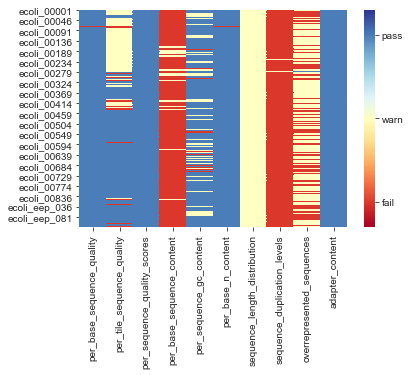

In [14]:
DF_fastqc = DF_qc_stats[fastqc_cols]
ax = sns.heatmap(DF_fastqc.replace('pass',1).replace('warn',0).replace('fail',-1),
            cmap='RdYlBu',vmax=1.3,vmin=-1.3)
cbar = ax.collections[0].colorbar
cbar.set_ticks([-1,0,1])
cbar.set_ticklabels(['fail','warn','pass'])

<font size="4">The following four categories are the most important:
    - per_base_sequence_quality
    - per_sequence_quality_scores
    - per_base_n_content
    - adapter_content
    
If a sample does not pass any of these four categories, discard the sample
</font>

In [15]:
fastqc_fail_cols = ['per_base_sequence_quality','per_sequence_quality_scores','per_base_n_content','adapter_content']

In [16]:
DF_failed_fastqc = DF_fastqc[fastqc_fail_cols][(DF_fastqc[fastqc_fail_cols] == 'fail').any(axis=1)]
DF_failed_fastqc[fastqc_fail_cols]

,per_base_sequence_quality,per_sequence_quality_scores,per_base_n_content,adapter_content
ecoli_00013,fail,warn,pass,pass
ecoli_00069,fail,pass,fail,pass
ecoli_00076,fail,pass,fail,pass


<font size="4">Mark samples as failed.</font>

In [17]:
DF_metadata['passed_fastqc'] = ~DF_metadata.index.isin(DF_failed_fastqc.index)

## Percent of reads aligned to genome

In [18]:
min_pct_aligned

40

In [19]:
align_cols = ['Assigned']
total_alignment = DF_qc_stats[align_cols].sum(axis=1)
percent_alignment = total_alignment.divide(DF_qc_stats['Total'])*100

Text(0.5, 1.0, 'Histogram of Alignment Percentage')

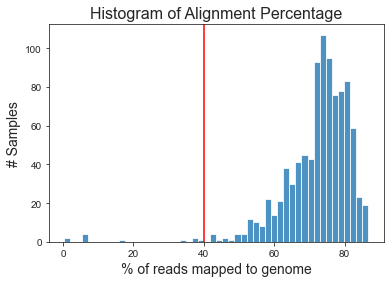

In [20]:
fig,ax = plt.subplots()
ax.hist(percent_alignment,bins=50,alpha=0.8)
ymin,ymax = ax.get_ylim()
ax.vlines(min_pct_aligned,ymin,ymax,color='r')
ax.set_ylim((ymin,ymax))
ax.set_xlabel('% of reads mapped to genome',fontsize=14)
ax.set_ylabel('# Samples',fontsize=14)
ax.set_title('Histogram of Alignment Percentage',fontsize=16)

In [21]:
DF_failed_mapping = DF_qc_stats[percent_alignment < min_pct_aligned]
DF_failed_mapping

,Total,Assigned,Unassigned_rRNA,Unassigned_Unmapped,Unassigned_Read_Type,Unassigned_Singleton,Unassigned_MappingQuality,Unassigned_Chimera,Unassigned_FragmentLength,Unassigned_Duplicate,...,r_written,bp_processed,quality_trimmed,bp_written,percent_trimmed,pe_sense,pe_antisense,failed,se_sense,se_antisense
ecoli_00151,3906008,1537833,1479914,55929,0,0,0,0,9857,0,...,3922738,137295830,143152,135630362,1.213051,0.4081,0.3212,0.2707,0.0,0.0
ecoli_00156,4833809,14785,3893423,251465,0,0,0,0,3031,0,...,4841148,726172200,1536519,656317481,9.619580,0.8505,0.0637,0.0858,0.0,0.0
ecoli_00367,6409073,2396849,2999202,80540,0,0,0,0,105408,0,...,6415979,256639160,564443,253273411,1.311471,0.0360,0.2346,0.7294,0.0,0.0
ecoli_00403,4837452,809302,3361607,175788,0,0,0,0,47770,0,...,4846082,489454282,2006772,485061325,0.897521,0.0611,0.1761,0.7627,0.0,0.0
ecoli_00726,9009414,31284,3668370,859929,0,0,0,0,27719,0,...,9033164,682613640,2339290,678983256,0.531836,0.4545,0.1599,0.3857,0.0,0.0
ecoli_00799,4206750,1593431,416287,97804,0,0,0,0,12376,0,...,4208394,214628094,221755,212514750,0.984654,0.0605,0.5627,0.3768,0.0,0.0
ecoli_00800,6136173,2135300,1522795,234165,0,0,0,0,23901,0,...,6138877,313082727,152877,310451375,0.840465,0.0507,0.4412,0.5081,0.0,0.0
ecoli_eep_005,12188565,726829,10586,10993290,0,0,0,0,110259,0,...,12242707,1236513407,475939,1226959357,0.772660,0.0582,0.4054,0.5364,0.0,0.0
ecoli_eep_006,13015021,820004,31015,11676995,0,0,0,0,116875,0,...,13080438,1321124238,515724,1310623347,0.794845,0.0518,0.4032,0.5451,0.0,0.0
ecoli_eep_007,12627923,781404,11586,11390353,0,0,0,0,125731,0,...,12685149,1281200049,443895,1271539497,0.754024,0.0456,0.4160,0.5384,0.0,0.0


In [22]:
DF_metadata['passed_pct_reads_mapped'] = ~DF_metadata.index.isin(DF_failed_mapping.index)

## Number of aligned reads

<font size="4">The following histogram shows how many reads map to coding sequences (i.e. mRNA). Too few aligned reads reduces the sensitivity of the resulting data.</font>

In [23]:
min_mrna_reads

500000.0

Text(0.5, 1.0, 'Number of reads mapped to CDS')

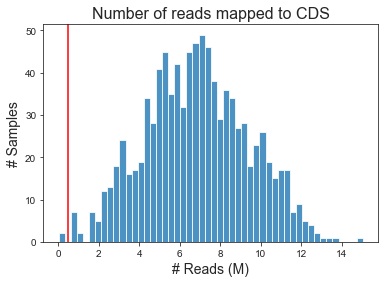

In [24]:
fig,ax = plt.subplots()
ax.hist(DF_qc_stats['Assigned']/1e6,bins=50,alpha=0.8)
ymin,ymax = ax.get_ylim()
ax.vlines(min_mrna_reads/1e6,ymin,ymax,color='r')
ax.set_ylim((ymin,ymax))
ax.set_xlabel('# Reads (M)',fontsize=14)
ax.set_ylabel('# Samples',fontsize=14)
ax.set_title('Number of reads mapped to CDS',fontsize=16)

<font size="4">Identify samples with poor read depth:</font>

In [25]:
DF_failed_mrna = DF_qc_stats[DF_qc_stats['Assigned'] < min_mrna_reads].sort_values('Assigned')
DF_failed_mrna

,Total,Assigned,Unassigned_rRNA,Unassigned_Unmapped,Unassigned_Read_Type,Unassigned_Singleton,Unassigned_MappingQuality,Unassigned_Chimera,Unassigned_FragmentLength,Unassigned_Duplicate,...,r_written,bp_processed,quality_trimmed,bp_written,percent_trimmed,pe_sense,pe_antisense,failed,se_sense,se_antisense
ecoli_00156,4833809,14785,3893423,251465,0,0,0,0,3031,0,...,4841148,726172200,1536519,656317481,9.619580,0.8505,0.0637,0.0858,0.0,0.0
ecoli_00726,9009414,31284,3668370,859929,0,0,0,0,27719,0,...,9033164,682613640,2339290,678983256,0.531836,0.4545,0.1599,0.3857,0.0,0.0


<font size="4">Mark samples as failed.</font>

In [26]:
DF_metadata['passed_reads_mapped_to_CDS'] = ~DF_metadata.index.isin(DF_failed_mrna.index)

# Examine Global Correlations

## Hierarchical Clustering

<font size=4> A clustermap is a great way to visualize the global correlations between one sample and all others. The following code uses hierarchical clustering to identify specific clusters in the clustermap <font size=4>
    
<font size=4> To increase the number of clusters, decrease the value of `thresh`. To decrease the number of clusters, increase the value of `thresh` <font size=4>

In [27]:
import scipy.cluster.hierarchy as sch
import matplotlib.patches as patches
# change this to get different number of clusters
thresh = .3

# retrieve clusters using fcluster 
corr = DF_log_tpm.corr()
corr.fillna(0,inplace=True)
dist = sch.distance.pdist(corr)
link = sch.linkage(dist, method='complete')
clst = pd.DataFrame(index=DF_log_tpm.columns)
clst['cluster'] = sch.fcluster(link, thresh * dist.max(), 'distance')

#get colors for each cluster
cm = plt.cm.get_cmap('tab20')
clr = dict(zip(clst.cluster.unique(), cm.colors))
clst['color'] = clst.cluster.map(clr)

print('Number of cluster: ', len(clr))

Number of cluster:  4


<font size="4">To view sample IDs in the clustermap, set `xticklabels` and `yticklabels` to `True`. You can increase the `size` variable to improve readability of sample IDs<font>

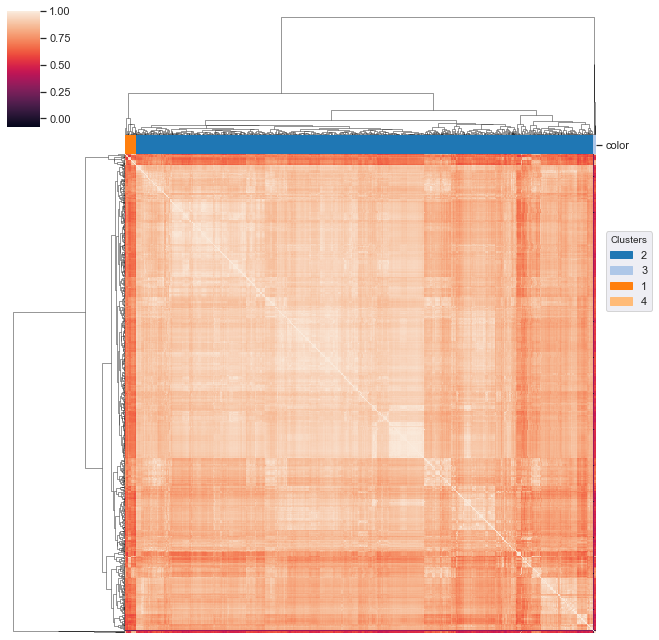

In [28]:
size = 9

legend_TN = [patches.Patch(color=c, label=l) for l,c in clr.items()]

sns.set(rc={'figure.facecolor':'white'})
g = sns.clustermap(DF_log_tpm.corr(), figsize=(size,size), 
                   row_linkage=link, col_linkage=link, col_colors=clst.color,
                  yticklabels=False, xticklabels=False)

l2=g.ax_heatmap.legend(loc='upper left', bbox_to_anchor=(1.01,0.85), handles=legend_TN,frameon=True)
l2.set_title(title='Clusters',prop={'size':10})

<font size="4">Select clusters to remove.</font>

In [29]:
#indicate which clusters you want to remove
remove_clst = [3,4]
failed_global_corr = clst[clst.cluster.isin(remove_clst)].index

In [30]:
clst[clst.cluster.isin(remove_clst)]

,cluster,color
ecoli_00156,3,"(0.6823529411764706, 0.7803921568627451, 0.909..."
ecoli_00726,4,"(1.0, 0.7333333333333333, 0.47058823529411764)"
ecoli_eep_068,3,"(0.6823529411764706, 0.7803921568627451, 0.909..."
ecoli_eep_073,3,"(0.6823529411764706, 0.7803921568627451, 0.909..."
ecoli_eep_074,3,"(0.6823529411764706, 0.7803921568627451, 0.909..."


In [31]:
DF_metadata['passed_global_correlation'] = ~DF_metadata.index.isin(failed_global_corr)

In [32]:
DF_metadata.head()

,sample_id,study,project_id,condition_id,rep_id,contact,creator,run_date,Strain Description,Strain,...,Published,SRX,Run,Notes,LibraryLayout,Platform,passed_fastqc,passed_pct_reads_mapped,passed_reads_mapped_to_CDS,passed_global_correlation
ecoli_00001,control__wt_glc__1,Control,control,wt_glc,1,Sangwoo Seo,Sangwoo Seo,4/17/13,Escherichia coli K-12 MG1655,MG1655,...,1.0,SRX865357,SRR1787590,NaN,PAIRED,ILLUMINA,True,True,True,True
ecoli_00002,control__wt_glc__2,Control,control,wt_glc,2,Sangwoo Seo,Sangwoo Seo,4/17/13,Escherichia coli K-12 MG1655,MG1655,...,1.0,SRX865358,SRR1787591,NaN,PAIRED,ILLUMINA,True,True,True,True
ecoli_00003,fur__wt_dpd__1,Fur,fur,wt_dpd,1,Sangwoo Seo,Sangwoo Seo,10/2/13,Escherichia coli K-12 MG1655,MG1655,...,1.0,SRX469840,SRR1168135,NaN,PAIRED,ILLUMINA,True,True,True,True
ecoli_00004,fur__wt_dpd__2,Fur,fur,wt_dpd,2,Sangwoo Seo,Sangwoo Seo,10/2/13,Escherichia coli K-12 MG1655,MG1655,...,1.0,SRX469841,SRR1168136,NaN,PAIRED,ILLUMINA,True,True,True,True
ecoli_00005,fur__wt_fe__1,Fur,fur,wt_fe,1,Sangwoo Seo,Sangwoo Seo,9/5/13,Escherichia coli K-12 MG1655,MG1655,...,1.0,SRX469838,SRR1168133,NaN,PAIRED,ILLUMINA,True,True,True,True


# Remove failed samples

In [33]:
qc_columns = ['passed_fastqc',
              'passed_reads_mapped_to_CDS',
              'passed_global_correlation']

In [34]:
pass_qc = DF_metadata[qc_columns].all(axis=1)
DF_metadata_passed = DF_metadata[pass_qc]

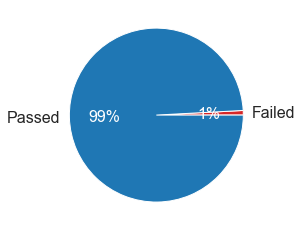

In [35]:
_,_,pcts = plt.pie(pass_qc.value_counts().sort_values(),
        labels = ['Failed','Passed'],
        colors=['tab:red','tab:blue'],
        autopct='%.0f%%',textprops={'size':16});

# Colors percents white
for pct in pcts:
    pct.set_color('white')

# Metadata Curation

<font size=4>The following sections can only be run after metadata curation is complete. To enable metadata curation, the code in this section sorts data by BioProject. </font>

## BioProject counts of passing metadata

In [36]:
print(len(DF_metadata_passed))
DF_metadata_passed.project_id.value_counts().sort_values(ascending=False)

936


eep          121
ros_tale     105
pcoli         94
tcs           62
hot_tale      54
abx_media     30
ica           30
ytf           28
oxyR          24
quinone       22
pal           22
crp           20
acid_tale     20
cck_pgi       18
ssw           18
efeU          16
svns_pgi      16
nac_ntrc      14
fps           14
omics         14
ytf2          14
rpoB          13
ytf3          12
minspan       12
misc2         12
nquinone      12
cra_crp       10
cck_pts       10
42c           10
cck_tpiA      10
misc           9
oxidative      8
fur            8
cck_gnd        8
pdhr_ale       8
cck_sdh        8
glu            7
acid           7
cck            6
ompr           4
adnB           4
control        2
Name: project_id, dtype: int64

## BioProject counts of all metadata

In [37]:
print(len(DF_metadata))
DF_metadata.project_id.value_counts().sort_values(ascending=False)

944


eep          124
ros_tale     105
pcoli         94
tcs           62
hot_tale      54
abx_media     30
ica           30
ytf           28
oxyR          24
quinone       22
pal           22
crp           20
acid_tale     20
cck_pgi       19
ssw           19
efeU          16
svns_pgi      16
minspan       14
fps           14
omics         14
nac_ntrc      14
ytf2          14
rpoB          13
ytf3          12
misc2         12
nquinone      12
cck_pts       10
42c           10
cck_tpiA      10
cra_crp       10
misc           9
oxidative      8
cck_gnd        8
acid           8
fur            8
pdhr_ale       8
cck_sdh        8
glu            7
cck            6
ompr           4
adnB           4
control        2
Name: project_id, dtype: int64

In [38]:
# Store Failed Samples for analysis

DF_metadata_fail_step1 = DF_metadata.loc[DF_metadata.index.difference(DF_metadata_passed.index), :]

DF_metadata_fail_step1.to_csv('metadata_failed_QC_step1_featureCounts.tsv', sep = "\t")

# Create copy here for part 2 
DF_metadata_passed_step1 = DF_metadata_passed.copy()

## Compute Pearson R Score

<font size="4">Once you have updated your metadata files with the sample information, we can investigate correlations between biological replicates. We require biological replicates to have a Pearson R correlation above 0.95. </font>

In [39]:
from tqdm import tqdm_notebook as tqdm
import itertools
from scipy import stats

In [40]:
DF_metadata_passed['full_name'] = DF_metadata_passed.loc[:,'project_id'].str.cat(DF_metadata_passed.loc[:,'condition_id'],sep=':')

/Users/cam/.virtualenvs/precise2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
rep_corrs = {}
rand_corrs = {}

num_comparisons = len(DF_metadata_passed)*(len(DF_metadata_passed)-1)/2
for exp1,exp2 in tqdm(itertools.combinations(DF_metadata_passed.index,2),total=num_comparisons):
    if DF_metadata_passed.loc[exp1,'full_name'] == DF_metadata_passed.loc[exp2,'full_name']:
        rep_corrs[(exp1,exp2)] = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]
    else:
        rand_corrs[(exp1,exp2)] = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]

/Users/cam/.virtualenvs/precise2/lib/python3.7/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


In [42]:
sns.set_style('ticks')

Median Pearson R between replicates: 0.99


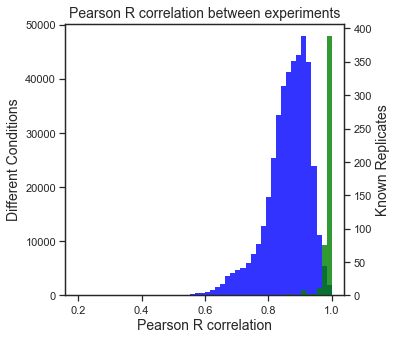

In [43]:
fig,ax = plt.subplots(figsize=(5,5))
ax2 = ax.twinx()
ax2.hist(rep_corrs.values(),bins=50,range=(0.2,1),alpha=0.8,color='green',linewidth=0)
ax.hist(rand_corrs.values(),bins=50,range=(0.2,1),alpha=0.8,color='blue',linewidth=0)
ax.set_title('Pearson R correlation between experiments',fontsize=14)
ax.set_xlabel('Pearson R correlation',fontsize=14)
ax.set_ylabel('Different Conditions',fontsize=14)
ax2.set_ylabel('Known Replicates',fontsize=14)

med_corr = np.median([v for k,v in rep_corrs.items()])
print('Median Pearson R between replicates: {:.2f}'.format(med_corr))

In [44]:
dissimilar = []
print('Most dissimilar replicates:')
for x in [(k,v) for k,v in rep_corrs.items() if v < 0.9]: #adjusted to be 0.9
    print(x)
    dissimilar.append(x[0][0])
    dissimilar.append(x[0][1])
dissimilar = set(dissimilar)
DF_metadata_passed['passed_similar_replicates'] = ~DF_metadata_passed.index.isin(dissimilar) #Changed condition ID to index

Most dissimilar replicates:
(('ecoli_eep_007', 'ecoli_eep_008'), 0.8614278323337651)
(('ecoli_eep_057', 'ecoli_eep_058'), 0.8807422455979922)
(('ecoli_eep_069', 'ecoli_eep_070'), 0.8634830260477955)


/Users/cam/.virtualenvs/precise2/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Correlations between replicates

In [45]:
DF_metadata_passed_input = DF_metadata_passed[DF_metadata_passed['passed_similar_replicates']]

<font size=4> First, get a full sample name </font>

In [46]:
# Turn off pesky warning
pd.set_option('mode.chained_assignment', None)

In [47]:
# Drop Samples with no replicates
cond_counts = DF_metadata_passed_input.condition_id.value_counts()
drop_conds = cond_counts[cond_counts < 2].index
print(len(drop_conds))
drop_conds

50


Index(['42c_ale9', '42c_ale8', '42c_ale3', 'wt_42c', 'glyc_ale1',
       'rpoBE546V_031', 'glc_xyl_xyl', 'xyl_ale2', 'glc_xyl_glc', '42c_ale5',
       'glu_ale5', 'nitr_031', 'pgi_ale2', 'xyl_ale1', 'wt_ade', 'wt_trp',
       'wt_031', 'xyl_ale3', 'glu_ale6', 'glc_ac_glc1', 'glc_glyc_glyc',
       'wt_044', 'rpoBE546V_glc', '5drib_ale10', '42c_ale6', '42c_ale1',
       '42c_ale10', 'bw_delmntr', 'glc_ale3', 'bw_delcra_trp', 'glc_ale1',
       'glu_ale9', 'glu_ale8', 'wt_xyl', 'lyx_ale2_f6', 'glyc_ale2',
       '42c_ale4', 'delgadx_ph5', 'glu_ale3', 'bw_delcra_glc', 'sdh_ale2',
       'glc_glyc_glc', 'bw_delnac_glc', 'glu_ale10', 'rpoBE546V_044',
       'BOP27_nuoB_A19F49-I1R1', 'glc_ac_ac2', '42c_ale2', 'bw_delnac_ade',
       'glc_ale2'],
      dtype='object')

In [48]:
DF_metadata_passed['passed_number_replicates'] = ~DF_metadata_passed.condition_id.isin(drop_conds)

# Remove failed samples

In [49]:
qc_columns = ['passed_similar_replicates']

In [50]:
DF_metadata_final = DF_metadata_passed[DF_metadata_passed[qc_columns].all(axis=1)]

We've determined that the putrescine project has serious issues, let's drop it entirely here:

In [51]:
DF_metadata_final = DF_metadata_final[DF_metadata_final['project_id'] != 'ptrc_reg']

In [52]:
DF_metadata_final.shape

(930, 45)

In [53]:
DF_log_tpm_final = DF_log_tpm[DF_metadata_final.index]

### Failed Samples analysis - part 2

In [54]:
# Store Failed Samples for analysis

DF_metadata_fail_step2 = DF_metadata_passed.loc[DF_metadata_passed_step1.index.difference(DF_metadata_final.index), :]

DF_metadata_fail_step2.to_csv('meta_data_failed_QC_step2_featureCounts.tsv', sep = "\t")

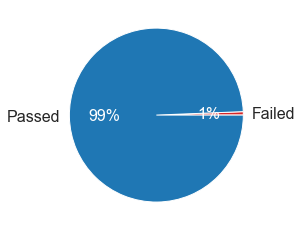

In [55]:
_,_,pcts = plt.pie([len(DF_metadata_fail_step2), len(DF_metadata)],
        labels = ['Failed','Passed'],
        colors=['tab:red','tab:blue'],
        autopct='%.0f%%',textprops={'size':16});

# Colors percents white
for pct in pcts:
    pct.set_color('white')

In [56]:
print(len(DF_metadata_fail_step2))

DF_metadata_fail_step2.project_id.value_counts().sort_values(ascending=False)

6


eep    6
Name: project_id, dtype: int64

In [57]:
# All Failed

DF_metadata_fail_total = pd.concat([DF_metadata_fail_step1, DF_metadata_fail_step2])

DF_metadata_fail_total.to_csv('meta_data_failed_QC_total_featureCounts.tsv', sep = "\t")

# Save final datasets

<font size=4> Choose a condition as the reference condition. Ideally, this would be the WT strain, grown in the most common base media for your organism. Defined media like M9 or MOPS are preferred, but many organisms only grow on rich media such as LB. </font>

In [64]:
# List all replicates for the reference condition
reference = ['ecoli_00001','ecoli_00002']

In [60]:
# Subtract mean expression of reference from entire dataset
DF_log_tpm_norm = DF_log_tpm_final.sub(DF_log_tpm_final[reference].mean(axis=1),axis=0)

In [61]:
DF_log_tpm_final.to_csv(os.path.join(org_dir,'log_tpm_qc.csv'))
DF_log_tpm_norm.to_csv(os.path.join(org_dir,'log_tpm_norm_qc.csv'))
DF_metadata_final.to_csv(os.path.join(org_dir,'metadata_qc.csv'))

# Save final dataset with all EEP Samples

## This is for Amitesh, as of 9/9/20

In [65]:
DF_metadata_eep = pd.concat([
    DF_metadata_final[DF_metadata_final['project_id'] != 'eep'],
    DF_metadata[DF_metadata['project_id'] == 'eep']
])
DF_log_tpm_eep = DF_log_tpm[DF_metadata_eep.index]
# Subtract mean expression of reference from entire dataset
DF_log_tpm_norm_eep = DF_log_tpm_eep.sub(DF_log_tpm_eep[reference].mean(axis=1),axis=0)

(4355, 939)

In [66]:
DF_log_tpm_eep.to_csv('~/Projects/misc_data/eep_log_tpm_qc.csv')
DF_log_tpm_norm_eep.to_csv('~/Projects/misc_data/eep_log_tpm_norm_qc.csv')
DF_metadata_eep.to_csv('~/Projects/misc_data/eep_metadata_qc.csv')

# Analyze difference compared to rockhopper data

In [79]:
# additional datasets run through FeatureCounts not present in QC-ed Rockhopper data

old_log_tpm_qc = pd.read_csv('../../data/precise2_data/log_tpm_norm_qc.csv')

RH_failed_inputs = DF_metadata.T[set(DF_log_tpm.columns) - set(old_log_tpm_qc.columns)].T.sort_index()
# exclude the newly-added EEP project (only run through featureCounts)
RH_failed_inputs = RH_failed_inputs[RH_failed_inputs['project_id'] != 'eep']
RH_failed_inputs

,sample_id,study,project_id,condition_id,rep_id,contact,creator,run_date,Strain Description,Strain,...,Published,SRX,Run,Notes,LibraryLayout,Platform,passed_fastqc,passed_pct_reads_mapped,passed_reads_mapped_to_CDS,passed_global_correlation
ecoli_00013,acid__delgadx_ph5__1,Acid,acid,delgadx_ph5,1,Sangwoo Seo,Sangwoo Seo,7/17/14,Escherichia coli K-12 MG1655 del_gadX,MG1655,...,1,SRX895932,SRR1824563,NaN,PAIRED,ILLUMINA,False,True,True,True
ecoli_00069,minspan__wt_glc__1,MinSpan,minspan,wt_glc,1,Aarash Bordbar,Haythem Latif,10/1/12,Escherichia coli K-12 MG1655,MG1655,...,1,SRX315212,SRR922260,NaN,PAIRED,ILLUMINA,False,True,True,True
ecoli_00076,minspan__bw_delcra_glc__1,MinSpan,minspan,bw_delcra_glc,1,Aarash Bordbar,Haythem Latif,10/1/12,Escherichia coli BW25113 del_cra,BW25113,...,1,SRX315222,SRR922270,NaN,PAIRED,ILLUMINA,False,True,True,True
ecoli_00156,ssw__glc_ac_glc2__1,Substrate-switching Evolution,ssw,glc_ac_glc2,1,Troy Sandberg,Ying Hefner,4/18/17,Escherichia coli SSW_GLU_AC.9.92.4,MG1655,...,1,SRX2744804,SRR5456735,Order wasn't specified for these 2 (possible t...,PAIRED,ILLUMINA,True,False,False,False
ecoli_00403,hot_tale__hot_ale3_mid_44c__1,HOT ALE,hot_tale,hot_ale3_mid_44c,1,Ke Chen,Ke Chen,9/27/18,Escherichia coli HOT_mutL.3.181.1,MG1655,...,0,NaN,NaN,NaN,PAIRED,ILLUMINA,True,False,True,True


NOTE: excluding the NEW EEP data with the ":5"; this is HARDCODED

In [80]:
new_failed = DF_metadata_fail_total.iloc[:5,pd.np.r_[0:2,-7:-1]]

new_failed

/Users/cam/.virtualenvs/precise2/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


,sample_id,study,passed_fastqc,passed_pct_reads_mapped,passed_reads_mapped_to_CDS,passed_global_correlation,full_name,passed_similar_replicates
ecoli_00013,acid__delgadx_ph5__1,Acid,False,True,True,True,NaN,NaN
ecoli_00069,minspan__wt_glc__1,MinSpan,False,True,True,True,NaN,NaN
ecoli_00076,minspan__bw_delcra_glc__1,MinSpan,False,True,True,True,NaN,NaN
ecoli_00156,ssw__glc_ac_glc2__1,Substrate-switching Evolution,True,False,False,False,NaN,NaN
ecoli_00726,cck_pgi__pgi_ale2__1,CCK_pgi,True,False,False,False,NaN,NaN


In [81]:
old_DF_metadata_fail = pd.read_csv('meta_data_failed_QC_total.tsv', sep = '\t', index_col=0)

old_failed = old_DF_metadata_fail.iloc[:,pd.np.r_[0:2,-7:-1]]

old_failed

/Users/cam/.virtualenvs/precise2/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until


,sample_id,study,passed_fastqc,passed_pct_reads_mapped,passed_reads_mapped_to_CDS,passed_global_correlation,full_name,passed_similar_replicates
ecoli_00013,acid__delgadx_ph5__1,Acid,False,False,True,True,NaN,NaN
ecoli_00069,minspan__wt_glc__1,MinSpan,False,True,True,True,NaN,NaN
ecoli_00076,minspan__bw_delcra_glc__1,MinSpan,False,True,True,True,NaN,NaN
ecoli_00156,ssw__glc_ac_glc2__1,Substrate-switching Evolution,True,True,False,True,NaN,NaN
ecoli_00403,hot_tale__hot_ale3_mid_44c__1,HOT ALE,True,True,False,True,NaN,NaN
ecoli_00801,ptrc_reg__wt_glu20_glyc__1,ptrc,True,True,False,True,NaN,NaN
ecoli_00803,ptrc_reg__delyneJ_glu20_glyc__1,ptrc,True,True,False,True,NaN,NaN
ecoli_00812,ptrc_reg__delyneJ_ptrc10_gln10_nh4__1,ptrc,True,True,False,True,NaN,NaN
ecoli_00814,ptrc_reg__wt_ptrc20_gln20_glyc__1,ptrc,True,False,False,True,NaN,NaN
ecoli_00802,ptrc_reg__wt_glu20_glyc__2,ptrc,True,True,True,True,ptrc_reg:wt_glu20_glyc,True


### Samples that only failed Rockhopper and passed FeatureCounts

Rockhopper stats

In [82]:
RH_failed_inputs

,sample_id,study,project_id,condition_id,rep_id,contact,creator,run_date,Strain Description,Strain,...,Published,SRX,Run,Notes,LibraryLayout,Platform,passed_fastqc,passed_pct_reads_mapped,passed_reads_mapped_to_CDS,passed_global_correlation
ecoli_00013,acid__delgadx_ph5__1,Acid,acid,delgadx_ph5,1,Sangwoo Seo,Sangwoo Seo,7/17/14,Escherichia coli K-12 MG1655 del_gadX,MG1655,...,1,SRX895932,SRR1824563,NaN,PAIRED,ILLUMINA,False,True,True,True
ecoli_00069,minspan__wt_glc__1,MinSpan,minspan,wt_glc,1,Aarash Bordbar,Haythem Latif,10/1/12,Escherichia coli K-12 MG1655,MG1655,...,1,SRX315212,SRR922260,NaN,PAIRED,ILLUMINA,False,True,True,True
ecoli_00076,minspan__bw_delcra_glc__1,MinSpan,minspan,bw_delcra_glc,1,Aarash Bordbar,Haythem Latif,10/1/12,Escherichia coli BW25113 del_cra,BW25113,...,1,SRX315222,SRR922270,NaN,PAIRED,ILLUMINA,False,True,True,True
ecoli_00156,ssw__glc_ac_glc2__1,Substrate-switching Evolution,ssw,glc_ac_glc2,1,Troy Sandberg,Ying Hefner,4/18/17,Escherichia coli SSW_GLU_AC.9.92.4,MG1655,...,1,SRX2744804,SRR5456735,Order wasn't specified for these 2 (possible t...,PAIRED,ILLUMINA,True,False,False,False
ecoli_00403,hot_tale__hot_ale3_mid_44c__1,HOT ALE,hot_tale,hot_ale3_mid_44c,1,Ke Chen,Ke Chen,9/27/18,Escherichia coli HOT_mutL.3.181.1,MG1655,...,0,NaN,NaN,NaN,PAIRED,ILLUMINA,True,False,True,True


In [83]:
RH_failed_inputs[~RH_failed_inputs.index.isin(new_failed.index)].index

Index(['ecoli_00403'], dtype='object')

In [84]:
old_failed.loc[RH_failed_inputs[~RH_failed_inputs.index.isin(new_failed.index)].index]

,sample_id,study,passed_fastqc,passed_pct_reads_mapped,passed_reads_mapped_to_CDS,passed_global_correlation,full_name,passed_similar_replicates
ecoli_00403,hot_tale__hot_ale3_mid_44c__1,HOT ALE,True,True,False,True,NaN,NaN


### Samples that failed both Rockhopper and FeatureCounts (FeatureCounts stats)

Rockhopper stats

In [85]:
old_failed.loc[RH_failed_inputs[RH_failed_inputs.index.isin(new_failed.index)].index]

,sample_id,study,passed_fastqc,passed_pct_reads_mapped,passed_reads_mapped_to_CDS,passed_global_correlation,full_name,passed_similar_replicates
ecoli_00013,acid__delgadx_ph5__1,Acid,False,False,True,True,NaN,NaN
ecoli_00069,minspan__wt_glc__1,MinSpan,False,True,True,True,NaN,NaN
ecoli_00076,minspan__bw_delcra_glc__1,MinSpan,False,True,True,True,NaN,NaN
ecoli_00156,ssw__glc_ac_glc2__1,Substrate-switching Evolution,True,True,False,True,NaN,NaN


FeatureCounts Stats

In [86]:
new_failed.loc[RH_failed_inputs[RH_failed_inputs.index.isin(new_failed.index)].index]

,sample_id,study,passed_fastqc,passed_pct_reads_mapped,passed_reads_mapped_to_CDS,passed_global_correlation,full_name,passed_similar_replicates
ecoli_00013,acid__delgadx_ph5__1,Acid,False,True,True,True,NaN,NaN
ecoli_00069,minspan__wt_glc__1,MinSpan,False,True,True,True,NaN,NaN
ecoli_00076,minspan__bw_delcra_glc__1,MinSpan,False,True,True,True,NaN,NaN
ecoli_00156,ssw__glc_ac_glc2__1,Substrate-switching Evolution,True,False,False,False,NaN,NaN


### Samples that only failed with FeatureCounts and not Rockhopper

FeatureCounts Stats

In [87]:
new_failed.loc[new_failed[~new_failed.index.isin(RH_failed_inputs.index)].index]

,sample_id,study,passed_fastqc,passed_pct_reads_mapped,passed_reads_mapped_to_CDS,passed_global_correlation,full_name,passed_similar_replicates
ecoli_00726,cck_pgi__pgi_ale2__1,CCK_pgi,True,False,False,False,NaN,NaN


### Samples that were only run through the Rockhopper pipeline and not FeatureCounts

In [88]:
DF_log_tpm = pd.read_csv(path.join(org_dir,'log_tpm.csv'),index_col=0).fillna(0)

old_failed.loc[old_failed[~old_failed.index.isin(DF_log_tpm.columns)].index]

,sample_id,study,passed_fastqc,passed_pct_reads_mapped,passed_reads_mapped_to_CDS,passed_global_correlation,full_name,passed_similar_replicates
ecoli_00801,ptrc_reg__wt_glu20_glyc__1,ptrc,True,True,False,True,NaN,NaN
ecoli_00803,ptrc_reg__delyneJ_glu20_glyc__1,ptrc,True,True,False,True,NaN,NaN
ecoli_00812,ptrc_reg__delyneJ_ptrc10_gln10_nh4__1,ptrc,True,True,False,True,NaN,NaN
ecoli_00814,ptrc_reg__wt_ptrc20_gln20_glyc__1,ptrc,True,False,False,True,NaN,NaN
ecoli_00802,ptrc_reg__wt_glu20_glyc__2,ptrc,True,True,True,True,ptrc_reg:wt_glu20_glyc,True
ecoli_00804,ptrc_reg__delyneJ_glu20_glyc__2,ptrc,True,True,True,True,ptrc_reg:delyneJ_glu20_glyc,True
ecoli_00805,ptrc_reg__wt_ptrc20_glu20_glyc__1,ptrc,True,True,True,True,ptrc_reg:wt_ptrc20_glu20_glyc,True
ecoli_00806,ptrc_reg__delyiaG_ptrc20_glu20_glyc__1,ptrc,True,True,True,True,ptrc_reg:delyiaG_ptrc20_glu20_glyc,True
ecoli_00807,ptrc_reg__delyneJ_ptrc20_glu20_glyc__1,ptrc,True,True,True,True,ptrc_reg:delyneJ_ptrc20_glu20_glyc,True
ecoli_00808,ptrc_reg__wt_ptrc10_gln10_nh4__1,ptrc,True,True,True,True,ptrc_reg:wt_ptrc10_gln10_nh4,True


In [89]:
len(old_failed.loc[old_failed[~old_failed.index.isin(DF_log_tpm.columns)].index])

17

#### Show the EEP samples that failed QC, for Amitesh

In [136]:
qc_columns_to_show = [
    'sample_id',
    'passed_global_correlation',
    'passed_similar_replicates'
]

DF_metadata_fail_total[DF_metadata_fail_total['project_id'] == 'eep'][qc_columns_to_show]

,sample_id,passed_global_correlation,passed_similar_replicates
ecoli_eep_068,eep__BOP27_nuoB_A19F49-I1R1__2,False,NaN
ecoli_eep_073,eep__BOP27_ndh_nuoB_A5F62-I1R1__1,False,NaN
ecoli_eep_074,eep__BOP27_ndh_nuoB_A5F62-I1R1__2,False,NaN
ecoli_eep_007,eep__WT_pyrE-rph_SRS__1,True,False
ecoli_eep_008,eep__WT_pyrE-rph_SRS__2,True,False
ecoli_eep_057,eep__BOP27_ndh_A15F46-I1R1__1,True,False
ecoli_eep_058,eep__BOP27_ndh_A15F46-I1R1__2,True,False
ecoli_eep_069,eep__BOP27_nuoB_A20F49-I1R1__1,True,False
ecoli_eep_070,eep__BOP27_nuoB_A20F49-I1R1__2,True,False
